In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, log, ceil

In [8]:
def karmarkar(y_i,D_i,A,c,n,r,alpha,close_enough,coords,verbose=False):
    P = np.concatenate((np.matmul(A,D_i),np.ones((1,n))))
    c_bar = np.matmul(c,D_i)
    c_p = np.matmul((np.eye(n)-np.matmul(np.matmul(P.T,np.linalg.inv(np.matmul(P,P.T))),P)),c_bar.T)
    y_new = y_i.T - ((alpha*r)*(np.divide(c_p,np.linalg.norm(c_p))))
    D_new = np.eye(n)*y_i
    Dy_new = np.matmul(D_new,y_new.T)
    x_new = np.divide(Dy_new,np.matmul(np.ones((1,n)),Dy_new))
    coords = np.concatenate(( coords,np.array([x_new[0:2].flatten()]) ))
    if(verbose): print(float((c@x_new).item()))
    if ( abs(float((c@x_new).item())) <= close_enough ):   
        if(verbose): print(coords)
        return y_new, D_new, x_new, coords
    else: 
        if(verbose): print(np.shape(y_new),np.shape(y_i),np.shape(D_new),np.shape(D_i),np.shape(x_new)) 
        return karmarkar(y_new.T,D_new,A,c,n,r,alpha,close_enough,coords,verbose)

def solveA(A,alphaConstant=3):
    n = len(A[0])
    r = 1/sqrt(n*(n-1))
    alpha = (n-1)/(alphaConstant*n)
    L = 1+ceil(log(len(A)*n)*2)*2
    Q = 2**L
    close_enough = 2**(-L)

    q = np.ones((1,n))
    q[0][-2] = Q
    q[0][-1] = Q-5
    A = np.concatenate((A,q))

    y_0 = np.ones((n,1)) * 1/n
    D_0 = np.eye(n) * 1/n
    c = np.concatenate((np.zeros((n-1)),np.array([1/n])))
    coords = np.array([[1/n,1/n]])
    y_n,D_n,x_n,coords = karmarkar(y_0,D_0,A,c,n,r,alpha,close_enough,coords)
    print(x_n)
    return y_n,D_n,x_n,coords

def printSolution(A,coords):
    n = len(A[0])
    x1, x2 = np.hsplit(coords,2)
    x1 = x1.flatten()*(n)
    x2 = x2.flatten()*(n)/A[0][1]

    fig, ax = plt.subplots()

    u = np.diff(x1)
    v = np.diff(x2)
    norm = np.sqrt(u**2+v**2) 
    ax.plot(x1,x2)
    ax.quiver(x1[:-1], x2[:-1], u/norm, v/norm, angles="xy", pivot="mid")
    ax.set(xlabel='', ylabel='',
        title='')
    ax.grid()
    plt.show()

[[ 1.32613332e-03]
 [ 2.30001308e-01]
 [ 6.08541631e-03]
 [ 4.82971987e-01]
 [ 3.38778459e-03]
 [ 4.34444255e-02]
 [ 2.32963727e-01]
 [-1.80781028e-04]]


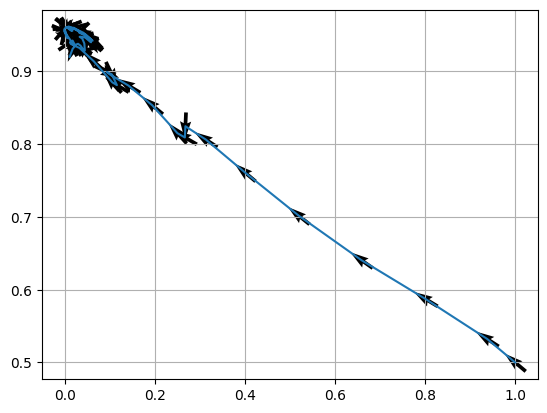

In [9]:
# Regular Solution
A = np.array([
    [ 1, 2,-1, 0, 0, 0,-2, 0],
    [ 0, 0, 0, 1, 1, 0,-2, 0],
    [ 3, 2, 0,-2, 0, 0, 0,-3]])

y_n,D_n,x_n,xcoords = solveA(A)
printSolution(A,xcoords)

[[ 5.19234938e-04]
 [ 1.92478835e-01]
 [ 1.47051652e-04]
 [ 1.68192606e-01]
 [ 4.26877161e-01]
 [ 4.23831235e-04]
 [ 4.01942662e-02]
 [ 1.71212948e-01]
 [-4.59342940e-05]]


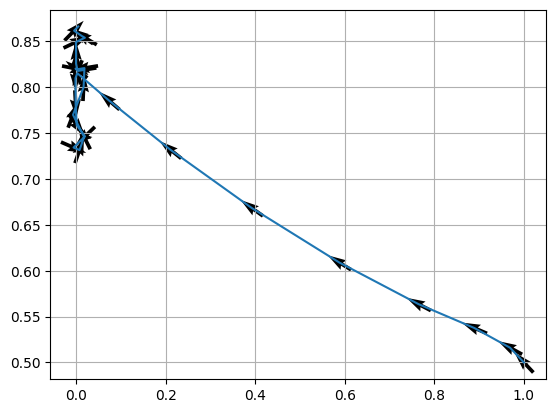

In [10]:
# Incorrect First Attempt
A = np.array([
    [1, 2,-1, 0, 0, 0, 0,-2, 0],
    [0, 0, 0, 1, 1, 0, 0,-3, 1],
    [0, 0, 0, 2, 0, 1, 0,-2,-1],
    [3, 2, 0,-2, 0, 0, 0, 0,-3]])

y_n,D_n,x_n,xcoords = solveA(A)
printSolution(A,xcoords)

[[4.56947393e-02]
 [2.02452492e-01]
 [1.94124352e-02]
 [3.10740344e-01]
 [1.35442161e-01]
 [6.50280582e-02]
 [2.20995122e-01]
 [2.34648587e-04]]


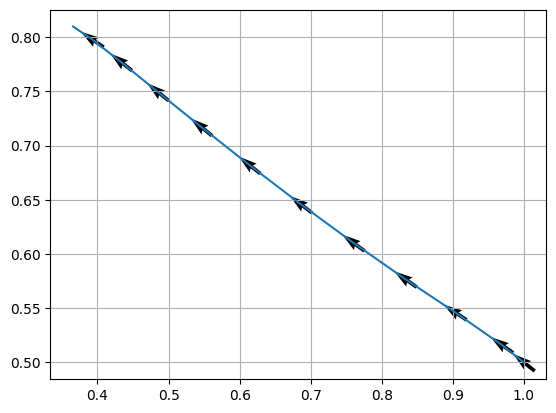

In [15]:
# Exploratory Analysis 
# Regular Solution
A = np.array([
    [ 1, 2,-1, 0, 0, 0,-2, 0],
    [ 0, 0, 0, 1, 1, 0,-2, 0],
    [ 3, 2, 0,-2, 0, 0, 0,-3]])

y_n,D_n,x_n,xcoords = solveA(A,6)
printSolution(A,xcoords)